In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

Version:  2.4.1
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [3]:
df = pd.read_csv("/content/drive/MyDrive/pos_and_neg_tweets_balanced_final.csv")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,user_name,user_location,user_description,user_created,user_followers,date,text,favorites,retweets,is_retweet,category,user_location_updated,user-country_code,user-country
0,0,0,AARPKY,Bluegrass State,Official AARP Kentucky Twitter. Get to know us...,2009-07-25 15:14:41,3266,2021-02-18 14:12:52,@3rdRetiredTeach See Kentucky's update vaccine...,0,0,False,Positive,Bluegrass State,USA,United States
1,1,1,GoSolar01,NaN,"Get all your solar info here, including latest...",2017-12-14 06:26:39,1861,2021-02-18 05:35:56,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,0,1,True,Positive,NaN,NaN,NaN
2,2,2,dr_hhq,"Karachi, Pakistan",Assistant Professor #Urology #SIUT - Half Prof...,2009-08-15 06:11:55,2378,2021-02-18 05:35:37,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,2,1,True,Positive,"Karachi, Pakistan",PAK,Pakistan
3,3,3,Nakhasi_MD,"Los Angeles, CA",Doc in Compton | Policy Adviser. LA County Dep...,2009-03-11 06:04:06,2205,2021-02-18 03:58:45,"RT @PinnacleTC_Hope: Holly Broce, president of...",0,1,True,Positive,"Los Angeles, CA",USA,United States
4,4,4,SonLaurencio,"Kentucky, USA",Pro Executive Entrepreneur #business #marketin...,2013-04-15 02:31:40,1558,2021-02-18 03:48:33,RT @LFCHD: A COVID-19 vaccine update thread:\n...,0,1,True,Positive,"Kentucky, USA",USA,United States


In [4]:
df_text = df.loc[:, ['text','category']]
df_text

,text,category
0,@3rdRetiredTeach See Kentucky's update vaccine...,Positive
1,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,Positive
2,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,Positive
3,"RT @PinnacleTC_Hope: Holly Broce, president of...",Positive
4,RT @LFCHD: A COVID-19 vaccine update thread:\n...,Positive
...,...,...
36691,RT @NickHudsonCT: Raising conflicts of interes...,Negative
36692,RT @NickHudsonCT: Raising conflicts of interes...,Negative
36693,RT @NickHudsonCT: Raising conflicts of interes...,Negative
36694,RT @NickHudsonCT: Raising conflicts of interes...,Negative


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

df_text = df_text[~df_text.duplicated()]
df_text

,text,category
0,@3rdRetiredTeach See Kentucky's update vaccine...,Positive
1,RT @dr_hhq: Chipped - #crushcovid #gettheshot ...,Positive
2,Chipped - #crushcovid #gettheshot 🇨🇳#covid #co...,Positive
3,"RT @PinnacleTC_Hope: Holly Broce, president of...",Positive
4,RT @LFCHD: A COVID-19 vaccine update thread:\n...,Positive
5,RT @AHS_media: “Looking at how hard these scie...,Positive
6,RT @BGISD: THANK YOU @MedCenterHealth and all ...,Positive
7,RT @medcoe: #GetTheShot 💉🦠 #IGotTheShot \n\nTh...,Positive
8,Social distancing.\nSeasonality.\nSeroprevalen...,Positive
9,"@CheltTwpPD Police Officer, Ryan Ewald, is one...",Positive


In [6]:
df_text['category'].value_counts()


Positive    5804
Negative    2400
Name: category, dtype: int64

In [7]:
import re

#Remove twitter Hashtags
df_text.text = df_text.text.apply(lambda x:' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
from sklearn.model_selection import train_test_split

X = df_text['text']
y = df_text['category']

y = pd.concat([y, pd.get_dummies(y, prefix='target')],axis=1)
y.drop(['category', 'target_Positive'],axis=1, inplace=True)
train_examples, test_examples, train_labels,  test_labels = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [9]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 6563, test entries: 1641


Let's print first 10 examples.

In [10]:
train_examples[:10]

13022                             What s Fukushima nonukes
32411    RT This is what the end of the pandemic looks ...
5298     We are one united in the fight against COVID 1...
999      Momma got her 1st jab today against COVID19 im...
32404    Received my second dose of the Pfizer vaccine ...
31210    RT Very happy indeed to have had my COVID19 va...
31085    The COVID19vaccine is safe and effective If yo...
2896     Once you schedule your vaccine patients will r...
30142    Mom just got her first shot So thankful getthe...
136      Pharmacies Participating in the Federal Retail...
Name: text, dtype: object

Let's also print the first 10 labels.

In [11]:
train_labels[:10]

,target_Negative
13022,1
32411,0
5298,0
999,0
32404,0
31210,0
31085,0
2896,0
30142,0
136,0


In [12]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.07458301, -0.391707  ,  0.06730239,  0.0960815 , -0.12028019,
        -0.33424294,  0.05445817, -0.09527281, -0.20442224, -0.08977844,
        -0.06017835, -0.01648019,  0.17530487, -0.08173381, -0.25424096,
         0.25246522, -0.02827121, -0.03773034, -0.0415021 ,  0.08841854,
        -0.05539522,  0.03229206,  0.22700758, -0.18868968, -0.20030382,
        -0.03534948, -0.00868512, -0.11527263, -0.1206868 ,  0.02214256,
        -0.11941437,  0.08209196, -0.07286134, -0.08177954,  0.0776584 ,
         0.07180966, -0.10905597, -0.04469819, -0.0075876 ,  0.01614343,
         0.09151233, -0.04575953, -0.02632355, -0.04462478, -0.30324337,
         0.06384149, -0.16569474, -0.00224718, -0.15664908, -0.0323309 ],
       [ 0.14412174,  0.1265716 ,  0.03475916,  0.39020446, -0.03525482,
        -0.1500827 ,  0.09787793,  0.12003753, -0.20150496,  0.03377452,
        -0.13823913,  0.0247563 , -0.13046986,  0.00641894, -0.04968993,
 

In [13]:
x_val = train_examples[:100]
partial_x_train = train_examples[100:]

y_val = train_labels[:100]
partial_y_train = train_labels[100:]

In [14]:
def build_model():
  model = tf.keras.Sequential()
  model.add(hub_layer)
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
history = keras_model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
13/13 [==============================] - 2s 64ms/step - loss: 0.6778 - accuracy: 0.5778 - val_loss: 0.6093 - val_accuracy: 0.7700
Epoch 2/40
13/13 [==============================] - 0s 31ms/step - loss: 0.5935 - accuracy: 0.7327 - val_loss: 0.5340 - val_accuracy: 0.8000
Epoch 3/40
13/13 [==============================] - 0s 32ms/step - loss: 0.5206 - accuracy: 0.7526 - val_loss: 0.4686 - val_accuracy: 0.8100
Epoch 4/40
13/13 [==============================] - 0s 32ms/step - loss: 0.4559 - accuracy: 0.7800 - val_loss: 0.4113 - val_accuracy: 0.8500
Epoch 5/40
13/13 [==============================] - 0s 32ms/step - loss: 0.3819 - accuracy: 0.8450 - val_loss: 0.3597 - val_accuracy: 0.8600
Epoch 6/40
13/13 [==============================] - 0s 33ms/step - loss: 0.3151 - accuracy: 0.9002 - val_loss: 0.3157 - val_accuracy: 0.8600
Epoch 7/40
13/13 [==============================] - 0s 33ms/step - loss: 0.2509 - accuracy: 0.9373 - val_loss: 0.2811 - val_accuracy: 0.8700
Epoch 8/40
13

In [16]:
keras_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 16)                816       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [17]:
results = keras_model.evaluate(test_examples, test_labels)

print(results)

52/52 [==============================] - 0s 3ms/step - loss: 0.1793 - accuracy: 0.9360
[0.17930586636066437, 0.9360146522521973]


In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

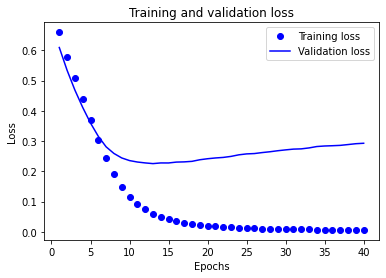

In [19]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

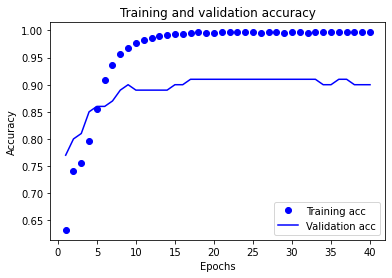

In [20]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [21]:
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score
y_pred_keras = keras_model.predict(test_examples).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_labels, y_pred_keras)

In [39]:
y_pred = pd.DataFrame(y_pred_keras > 0.5)

In [41]:
precision, recall, _ = precision_recall_curve(test_labels, y_pred)

In [42]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

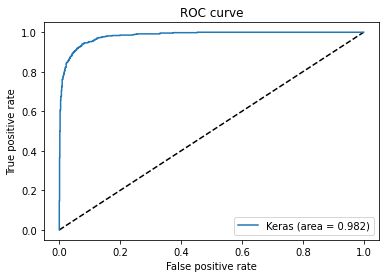

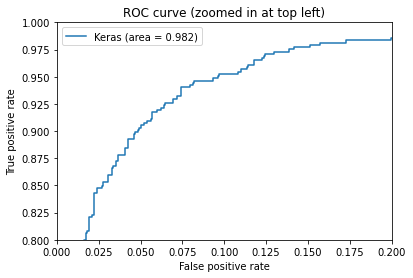

In [43]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.metrics import classification_report

target_names = ['non-anti-vax', 'anti-vax']
print(classification_report(test_labels, y_pred, target_names=target_names))

              precision    recall  f1-score   support

non-anti-vax       0.95      0.96      0.96      1156
    anti-vax       0.91      0.87      0.89       485

    accuracy                           0.94      1641
   macro avg       0.93      0.92      0.92      1641
weighted avg       0.94      0.94      0.94      1641



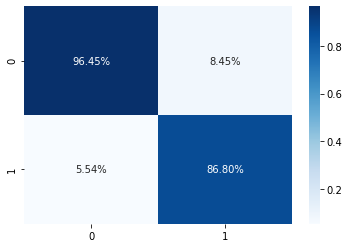

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(test_labels, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, fmt='.2%', cmap='Blues')